In [15]:
# Get Medium data for primary derived cell lines 11765 - Ham's F-12 Nutrient Mix

from bs4 import BeautifulSoup
import requests
import pandas as pd

url = requests.get("https://www.thermofisher.com/us/en/home/technical-resources/media-formulation.64.html")
htmltext = url.text

soup = BeautifulSoup(htmltext)
table = soup.find("table")

df = pd.read_html(str(table))[0]

# Clean up the table 
# drop rows that contain a string type in colum where it should be a number
df_11765= df[~df['mM'].str.contains("[a-zA-Z]").fillna(False)]


C:\Users\dw6835\AppData\Local\Temp\ipykernel_768688\3339662011.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [2]:
# Estimation of the beta-oxidation rate basde on results from conventionsl cell culture media
# Calculation:
# 	- 250 pmol/min total basal OCR
# 	- 150-175 pmol/min ETC dep OCR
# 	- 20% beta-oxidation -> 30-35 pmin/min OCR
# 	- 1.4 O2 / Co2 -> 16 C -> 16 * 1.4 -> 22.4 O2 per palmitate
# 	- 30/22.4 = 1.3 - 1.56 pmol/min
#

# ORC 50 - 150 pmol/min 
lb_pmt_u, ub_pmt_u = 50 * 0.2 /22.4, 150 * 0.4 /22.4


In [16]:
# Media 100 uM in 2ml 
pmt_low = 100 * 2 * 1e3 /100 # 200 nmol -> 200 x 10^3 pmol
pmt_high = 500 * 2 * 1e3  / 100 # 200 nmol

(0.0, 1.1)

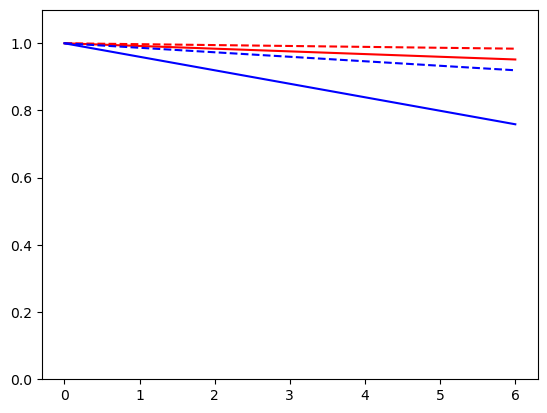

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Relative change in pmt concentration expectation
time = np.linspace(0, 6, 100)

plt.plot(time, (pmt_high - lb_pmt_u * time * 60)/pmt_high , label="High (min uptake)" , color='red' , linestyle='--')
plt.plot(time, (pmt_high - ub_pmt_u * time * 60)/pmt_high , label="High (max uptake)" , color='red')

plt.plot(time, (pmt_low - lb_pmt_u * time * 60)/pmt_low , label="Low (min uptake)", color='blue', linestyle='--')
plt.plot(time, (pmt_low - ub_pmt_u * time * 60)/pmt_low , label="Low (max uptake)", color='blue')

plt.ylim(0, 1.1)


In [ ]:
# Agilent beta ox seahorse https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9120230/
